In [16]:
import pandas as pd
from scipy.cluster import hierarchy
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Read all KEGG pathways files
kegg_adhd = pd.read_csv('KEGG/KEGG_2021_ADHD.txt', sep='\t')
kegg_adhd['Disorder'] = 'adhd'
kegg_asd = pd.read_csv('KEGG/KEGG_2021_ASD.txt', sep='\t')
kegg_asd['Disorder'] = 'asd'
kegg_anorexia = pd.read_csv('KEGG/KEGG_2021_ANOREXIA.txt', sep='\t')
kegg_anorexia['Disorder'] = 'anorexia'
kegg_anxiety = pd.read_csv('KEGG/KEGG_2021_ANXIETY.txt', sep='\t')
kegg_anxiety['Disorder'] = 'anxiety'
kegg_aud = pd.read_csv('KEGG/KEGG_2021_AUD.txt', sep='\t')
kegg_aud['Disorder'] = 'aud'
kegg_bpd = pd.read_csv('KEGG/KEGG_2021_BPD.txt', sep='\t')
kegg_bpd['Disorder'] = 'bpd'
kegg_cud = pd.read_csv('KEGG/KEGG_2021_CUD.txt', sep='\t')
kegg_cud['Disorder'] = 'cud'
kegg_hoarding = pd.read_csv('KEGG/KEGG_2021_HOARDING.txt', sep='\t')
kegg_hoarding['Disorder'] = 'hoarding'
kegg_mdd = pd.read_csv('KEGG/KEGG_2021_MDD.txt', sep='\t')
kegg_mdd['Disorder'] = 'mdd'
kegg_ocd = pd.read_csv('KEGG/KEGG_2021_OCD.txt', sep='\t')
kegg_ocd['Disorder'] = 'ocd'
kegg_od = pd.read_csv('KEGG/KEGG_2021_OD.txt', sep='\t')
kegg_od['Disorder'] = 'od'
kegg_ptsd = pd.read_csv('KEGG/KEGG_2021_PTSD.txt', sep='\t')
kegg_ptsd['Disorder'] = 'ptsd'
kegg_scz = pd.read_csv('KEGG/KEGG_2021_SCZ.txt', sep='\t')
kegg_scz['Disorder'] = 'scz'
kegg_tourettes = pd.read_csv('KEGG/KEGG_2021_TOURETTE.txt', sep='\t')
kegg_tourettes['Disorder'] = 'tourettes'

In [18]:
#Read all wikipathways files

wiki_adhd = pd.read_csv('Wiki_pathways/WikiPathway_2023_ADHD.txt', sep='\t')
wiki_adhd['Disorder'] = 'adhd'
wiki_asd = pd.read_csv('Wiki_pathways/WikiPathway_2023_ASD.txt', sep='\t')
wiki_asd['Disorder'] = 'asd'
wiki_anorexia = pd.read_csv('Wiki_pathways/WikiPathway_2023_ANOREXIA.txt', sep='\t')
wiki_anorexia['Disorder'] = 'anorexia'
wiki_anxiety = pd.read_csv('Wiki_pathways/WikiPathway_2023_ANXIETY.txt', sep='\t')
wiki_anxiety['Disorder'] = 'anxiety'
wiki_aud = pd.read_csv('Wiki_pathways/WikiPathway_2023_AUD.txt', sep='\t')
wiki_aud['Disorder'] = 'aud'
wiki_bpd = pd.read_csv('Wiki_pathways/WikiPathway_2023_BPD.txt', sep='\t')
wiki_bpd['Disorder'] = 'bpd'
wiki_cud = pd.read_csv('Wiki_pathways/WikiPathway_2023_CUD.txt', sep='\t')
wiki_cud['Disorder'] = 'cud'
wiki_hoarding = pd.read_csv('Wiki_pathways/WikiPathway_2023_HOARDING.txt', sep='\t')
wiki_hoarding['Disorder'] = 'hoarding'
wiki_mdd = pd.read_csv('Wiki_pathways/WikiPathway_2023_MDD.txt', sep='\t')
wiki_mdd['Disorder'] = 'mdd'
wiki_ocd = pd.read_csv('Wiki_pathways/WikiPathway_2023_OCD.txt', sep='\t')
wiki_ocd['Disorder'] = 'ocd'
wiki_od = pd.read_csv('Wiki_pathways/WikiPathway_2023_OD.txt', sep='\t')
wiki_od['Disorder'] = 'od'
wiki_ptsd = pd.read_csv('Wiki_pathways/WikiPathway_2023_PTSD.txt', sep='\t')
wiki_ptsd['Disorder'] = 'ptsd'
wiki_scz = pd.read_csv('Wiki_pathways/WikiPathway_2023_SCZ.txt', sep='\t')
wiki_scz['Disorder'] = 'scz'
wiki_tourettes = pd.read_csv('Wiki_pathways/WikiPathway_2023_TOURETTE.txt', sep='\t')
wiki_tourettes['Disorder'] = 'tourettes'

In [19]:
# List of all dataframes
dfs_wiki = [wiki_adhd,wiki_asd,wiki_anorexia,wiki_anxiety,wiki_aud,wiki_bpd,wiki_cud,wiki_hoarding,wiki_mdd,wiki_ocd,wiki_od, wiki_ptsd,wiki_scz,wiki_tourettes]
dfs_kegg = [kegg_adhd,kegg_asd,kegg_anorexia,kegg_anxiety,kegg_aud, kegg_bpd,kegg_cud,kegg_hoarding,kegg_mdd,kegg_ocd,kegg_od, kegg_ptsd,kegg_scz,kegg_tourettes]


In [20]:
# Filter each DataFrame and store the filtered DataFrames in a new list
#filtered_wiki_dataframes = []
dfs_wiki_new = []
for df in dfs_wiki:
    # Count the number of genes in each row using the ';' separator
    df['Gene Count'] = df['Genes'].str.count(';') + 1
    filtered_wiki = df[(df['Adjusted P-value'] < 0.05) & (df['Gene Count'] >= 5)]
    #filtered_wiki_dataframes.append(filtered_wiki)
    if not filtered_wiki.empty:
        dfs_wiki_new.append(filtered_wiki)


# Filter each DataFrame and store the filtered DataFrames in a new list
#filtered_kegg_dataframes = []
dfs_kegg_new = []
for df in dfs_kegg:
    df['Gene Count'] = df['Genes'].str.count(';') + 1
    filtered_kegg = df[(df['Adjusted P-value'] < 0.05) & (df['Gene Count'] >= 5)]
    #filtered_kegg_dataframes.append(filtered_kegg)
    if not filtered_kegg.empty:
        dfs_kegg_new.append(filtered_kegg)

In [21]:
print(len(dfs_kegg_new), len(dfs_wiki_new))

0 6


In [22]:
wiki_dfs_copy = dfs_wiki_new.copy()
concat_wiki_dfs = pd.concat(wiki_dfs_copy, ignore_index=True)


In [33]:
concat_wiki_dfs

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,Disorder,Gene Count
0,8P23 1 Copy Number Variation Syndrome WP5346,19/52,1.684992e-31,2.392689e-29,0,0,142.989394,10131.996368,TNKS;PINX1;SLC35G5;MTMR9;DEFB134;PRSS55;RP1L1;...,asd,19
1,Hippo Signaling Regulation Pathways WP4540,6/98,1.729368e-04,4.594326e-02,0,0,7.996624,69.271433,PRKAR2A;MST1;CTNNB1;TEK;RHOA;GNAI2,anorexia,6
2,Arrhythmogenic Right Ventricular Cardiomyopath...,5/74,3.868500e-04,4.594326e-02,0,0,8.840580,69.464621,ACTN2;ITGA2;DAG1;ITGA7;CTNNB1,anorexia,5
3,Hippo Merlin Signaling Dysregulation WP4541,6/120,5.162165e-04,4.594326e-02,0,0,6.446224,48.791371,PRKAR2A;ITGA2;MST1;ITGA7;CTNNB1;TEK,anorexia,6
4,17Q12 Copy Number Variation Syndrome WP5287,12/100,1.098000e-09,2.602259e-07,0,0,12.847542,265.041920,FBXL20;STARD3;MIEN1;PGAP3;PPP1R1B;ERBB2;STAC2;...,aud,12
5,16P11 2 Distal Deletion Syndrome WP4950,6/31,9.940915e-07,1.177998e-04,0,0,22.050977,304.776177,RABEP2;NFATC2IP;ATP2A1;LAT;SH2B1;TUFM,aud,6
6,8P23 1 Copy Number Variation Syndrome WP5346,18/52,1.329982e-09,7.168601e-07,0,0,7.912399,161.714417,BLK;TNKS;PINX1;MTMR9;DEFB134;PRSS55;MTMR7;PRSS...,bpd,18
7,15Q25 Copy Number Variation WP5408,16/45,7.027924e-09,1.894025e-06,0,0,8.234912,154.597088,NMB;ZNF592;BNC1;HOMER2;C15ORF40;WDR73;AP3B2;CP...,bpd,16
8,2Q11 2 Copy Number Variation Syndrome WP5221,13/32,2.834313e-08,5.092315e-06,0,0,10.193429,177.150399,LMAN2L;STARD7;ARID5A;ADRA2B;CIAO1;ITPRIPL1;TME...,bpd,13
9,15Q25 Copy Number Variation WP5408,5/45,9.507445e-06,1.454639e-03,0,0,20.320697,234.977064,BTBD1;HOMER2;C15ORF40;WHAMM;AP3B2,cud,5


In [23]:
concat_wiki_dfs.to_csv('Wiki_pathways_filtered2.csv')

In [24]:
# Create an empty list to store unique names
df_names = []

# Loop through the first list of DataFrames
for dataframes in [dfs_wiki_new, dfs_kegg_new]:
    for df in dataframes:
        # Extract unique names from the 'disorder' column and add them to the list
        df_names.extend(df['Disorder'].unique())

# Convert the list to a set to remove duplicates and then back to a list
df_names = list(set(df_names))

In [25]:
print(df_names)

['scz', 'cud', 'aud', 'bpd', 'asd', 'anorexia']


In [26]:
#Check if list of dfs is empty
if not dfs_kegg_new:
    print('List is empty')
else:
    
    # Extract unique Gene identifiers and DataFrame names
    unique_pathway_kegg = pd.concat([df['Term'] for df in dfs_kegg_new], ignore_index=True).drop_duplicates()
    
    # Create a dictionary to store the gene data for each DataFrame
    pathway_data_kegg = {}
    for df, df_name in zip(dfs_kegg_new, df_names):
        pathway_data_kegg[df_name] = df['Term'].tolist()
    
    # Create a new DataFrame with unique gene identifiers as rows and DataFrame names as columns
    result_df_kegg = pd.DataFrame(index=unique_pathway_kegg, columns=df_names)
    
    # Fill in the DataFrame with gene data
    for df_name in df_names:
        result_df_kegg.loc[pathway_data_kegg[df_name], df_name] = 1
    
    # Fill NaN values with 0
    result_df_kegg.fillna(0, inplace=True)
    
    result_df_kegg.index.name= None

List is empty


In [27]:
#Check if list of dfs is empty
if not dfs_wiki_new:
    print('List is empty')
# Extract unique Gene identifiers and DataFrame names
unique_pathway_wiki = pd.concat([df['Term'] for df in dfs_wiki_new], ignore_index=True).drop_duplicates()

# Create a dictionary to store the gene data for each DataFrame
pathway_data_wiki = {}
for df, df_name in zip(dfs_wiki_new, df_names):
    pathway_data_wiki[df_name] = df['Term'].tolist()

# Create a new DataFrame with unique gene identifiers as rows and DataFrame names as columns
result_df_wiki = pd.DataFrame(index=unique_pathway_wiki, columns=df_names)

# Fill in the DataFrame with gene data
for df_name in df_names:
    result_df_wiki.loc[pathway_data_wiki[df_name], df_name] = 1

# Fill NaN values with 0
result_df_wiki.fillna(0, inplace=True)

result_df_wiki.index.name= None

In [32]:
result_df_wiki

,scz,cud,aud,bpd,asd,anorexia
8P23 1 Copy Number Variation Syndrome WP5346,1,0,0,1,0,1
Hippo Signaling Regulation Pathways WP4540,0,1,0,0,0,0
Arrhythmogenic Right Ventricular Cardiomyopathy WP2118,0,1,0,0,0,0
Hippo Merlin Signaling Dysregulation WP4541,0,1,0,0,0,0
17Q12 Copy Number Variation Syndrome WP5287,0,0,1,0,0,0
16P11 2 Distal Deletion Syndrome WP4950,0,0,1,0,0,0
15Q25 Copy Number Variation WP5408,0,0,0,1,1,1
2Q11 2 Copy Number Variation Syndrome WP5221,0,0,0,1,0,0


In [28]:
result_df_wiki.to_csv('wikipathways_filtered2.csv')

In [29]:
# 

# 
# #hierarchical clustering
# linkage_matrix = hierarchy.linkage(result_df_kegg, method='average')
# 
# #create dendogram
# labels = np.arange(result_df_kegg.shape[0])
# plt.figure(figsize=(15, 10))
# dendrogram = hierarchy.dendrogram(linkage_matrix, labels=labels)
# plt.title('Dendrogram')
# plt.ylabel('Linkage distance')
# plt.xlabel('KEGG pathways')
# plt.show()

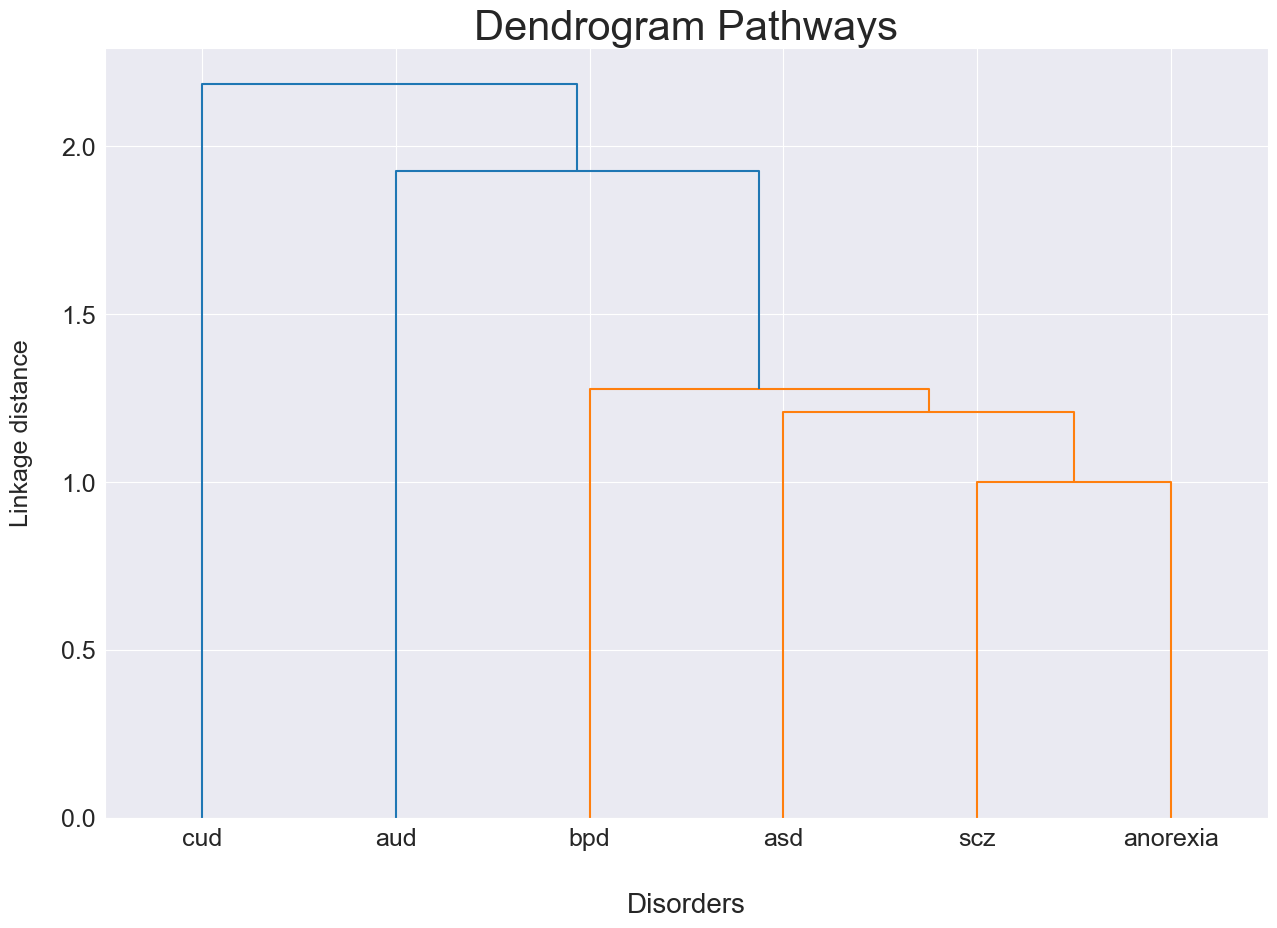

In [31]:

#hierarchical clustering
linkage_matrix2 = hierarchy.linkage(result_df_wiki.T, method='average')

#create dendogram

plt.figure(figsize=(15, 10))
dendrogram2 = hierarchy.dendrogram(linkage_matrix2, labels=df_names)
plt.title('Dendrogram Pathways', fontsize=30)
plt.ylabel('Linkage distance', fontsize=18)
plt.xlabel('Disorders', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
plt.xlabel('Disorders', labelpad=30)
plt.ylabel('Linkage distance', labelpad=20)
plt.show()